In [1]:
from helpers import read_data, σ0_soil, water_cloud_model, locsFull, predict_optimized
import lmfit
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import seaborn as sns; sns.set(rc={'figure.figsize':(8,5)})

In [2]:
data, specs, locations, result, σ0, σ0_opt = predict_optimized(); # helpers.predict_optimized()
σ0_opt["ala"].head()

pred       res   σ0_soil       vol      surf  \
time                                                                            
2007-01-03 11:33:39.374012 -13.780533  1.148846  0.080108  0.015381  0.026493   
2007-01-03 22:52:30.000000 -13.791353  1.277986  0.079793  0.015381  0.026389   
2007-01-05 12:32:16.874990 -13.829926  0.972947  0.078711  0.015386  0.026015   
2007-01-05 23:51:09.373990 -13.775962  1.310373  0.080277  0.015386  0.026533   
2007-01-08 11:30:14.999020 -13.836657  1.354344  0.078546  0.015390  0.025947   

                               total  
time                                  
2007-01-03 11:33:39.374012  0.041874  
2007-01-03 22:52:30.000000  0.041770  
2007-01-05 12:32:16.874990  0.041401  
2007-01-05 23:51:09.373990  0.041918  
2007-01-08 11:30:14.999020  0.041337

In [3]:
# optimized parameters
for loc in locations:
    printmd(f"# {locsFull[loc]}:")
    display(result[loc])

# Alabama:

# Gevenich:

In [4]:
MAE = {}
MAE_opt = {}
for loc in locations:
    MAE[loc] = σ0[loc].res.abs().mean()
    MAE_opt[loc] = σ0_opt[loc].res.abs().mean()
    printmd(f"## {locsFull[loc]}:")
    print(f"mean absolute error: {MAE[loc]:.3f} dB")
    print(f"mean absolute error (optimized): {MAE_opt[loc]:.3f} dB")

## Alabama:

mean absolute error: 0.660 dB
mean absolute error (optimized): 0.644 dB


## Gevenich:

mean absolute error: 2.324 dB
mean absolute error (optimized): 0.430 dB


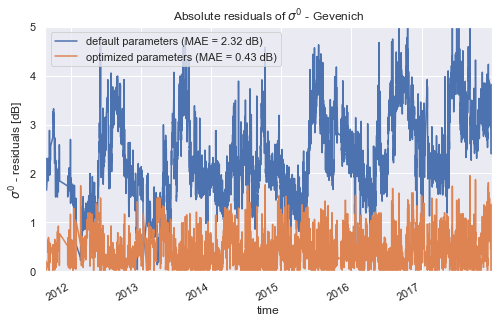

In [5]:
# plots of residuals
MAE = {}
MAE_opt = {}
for loc in locations:
    MAE[loc] = σ0[loc].res.abs().mean()
    MAE_opt[loc] = σ0_opt[loc].res.abs().mean()
    
    σ0[loc].res.abs().plot(label=f"default parameters (MAE = {MAE[loc]:.2f} dB)")
    σ0_opt[loc].res.abs().plot(label=f"optimized parameters (MAE = {MAE_opt[loc]:.2f} dB)")
    plt.title(f"Absolute residuals of $\sigma^0$ - {locsFull[loc]}")
    plt.ylim(0,5)
    plt.ylabel("$\sigma^0$ - residuals [dB]")
    plt.legend()
    plt.savefig(os.path.join("plots", "residuals", f"{loc}_absolute.png"), bbox_inches="tight")
    plt.show()

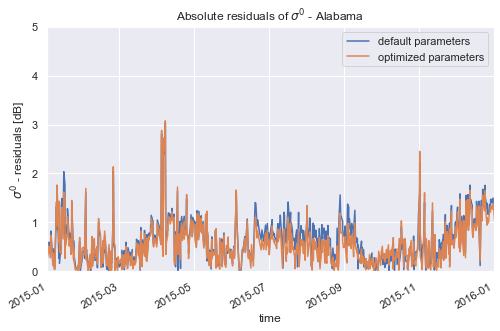

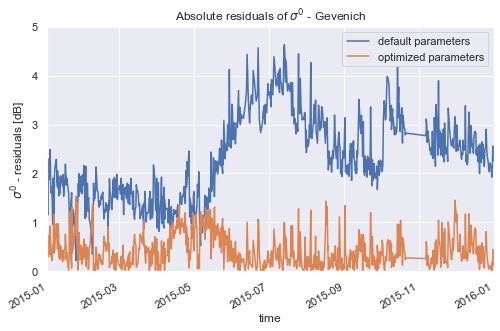

In [6]:
# plots of residuals 2015
for loc in locations:
    σ0[loc].res.abs().plot(label="default parameters")
    σ0_opt[loc].res.abs().plot(label="optimized parameters")
    plt.title(f"Absolute residuals of $\sigma^0$ - {locsFull[loc]}")
    plt.ylim(0,5)
    plt.xlim(pd.datetime(2015,1,1), pd.datetime(2016,1,1))
    plt.ylabel("$\sigma^0$ - residuals [dB]")
    plt.legend()
    plt.savefig(os.path.join("plots", "residuals", f"{loc}_absolute_2015.png"), bbox_inches="tight")
    plt.show()

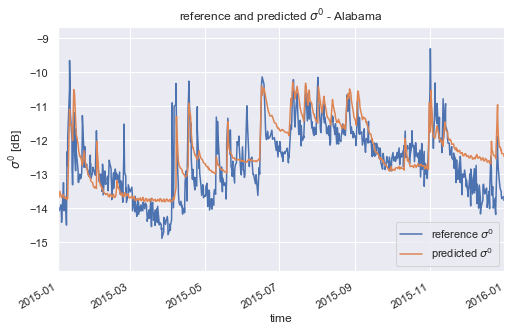

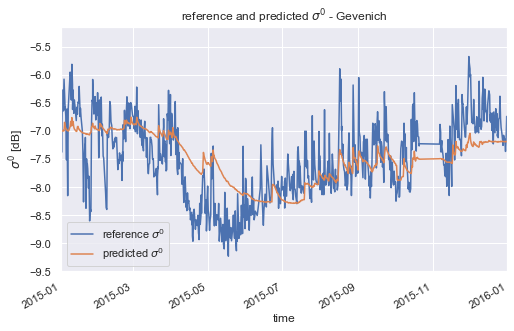

In [7]:
for loc in locations:
    data[loc].SIG40.plot(label="reference $\sigma^0$")
    σ0_opt[loc].pred.plot(label="predicted $\sigma^0$")
    plt.ylabel("$\sigma^0$ [dB]")
    plt.title(f"reference and predicted $\sigma^0$ - {locsFull[loc]}")
    plt.legend()
    plt.savefig(os.path.join("plots", "sigma0",  f"{loc}_dB.png"), bbox_inches = "tight")
    plt.xlim(pd.datetime(2015,1,1), pd.datetime(2016,1,1))
    plt.savefig(os.path.join("plots", "sigma0", f"{loc}_dB_2105.png"), bbox_inches = "tight")
    plt.show()

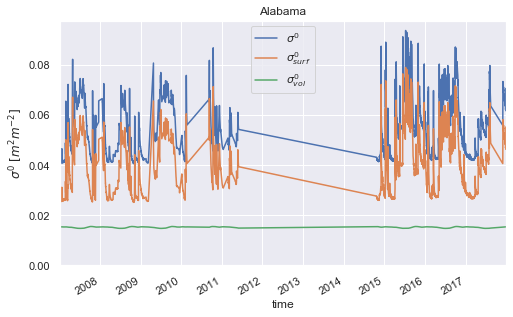

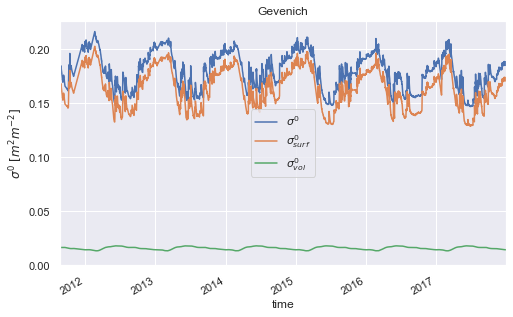

In [8]:
# backscatter contributions from surf, vol
for loc in locations:
#     (10 ** ((data[loc].SIG40)/10)).plot(label = r"reference $\sigma^0_{vol}$")
    σ0_opt[loc].total.plot(label = r"$\sigma^0$")
    σ0_opt[loc].surf.plot(label = r"$\sigma^0_{surf}$")
    σ0_opt[loc].vol.plot(label = r"$\sigma^0_{vol}$")
    plt.title(locsFull[loc])
    plt.ylim(0)
    
    plt.ylabel("$\sigma^0 \ [m^2 m^{-2}]$")
    
    
    plt.legend()
    plt.savefig(os.path.join("plots", "sigma0", f"{loc}_lin.png"), bbox_inches="tight")
    plt.show()

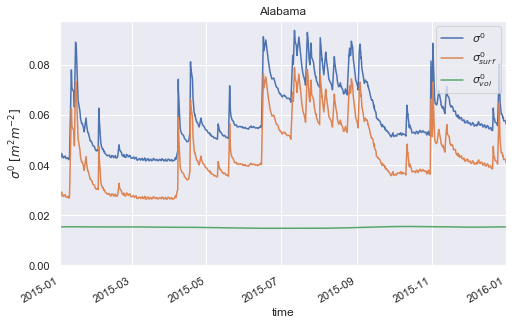

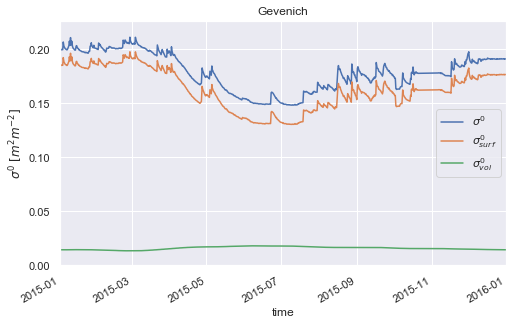

In [9]:
# backscatter contributions from surf, vol 2015
for loc in locations:
    σ0_opt[loc].total.plot(label = r"$\sigma^0$")
    σ0_opt[loc].surf.plot(label = r"$\sigma^0_{surf}$")
    σ0_opt[loc].vol.plot(label = r"$\sigma^0_{vol}$")
    plt.title(locsFull[loc])
    plt.ylim(0)
    
    plt.ylabel("$\sigma^0 \ [m^2 m^{-2}]$")
    
    plt.xlim(pd.datetime(2015,1,1), pd.datetime(2016,1,1))
    plt.legend()
    plt.savefig(os.path.join("plots", "sigma0", f"{loc}_lin_2015.png"), bbox_inches="tight")
    plt.show()

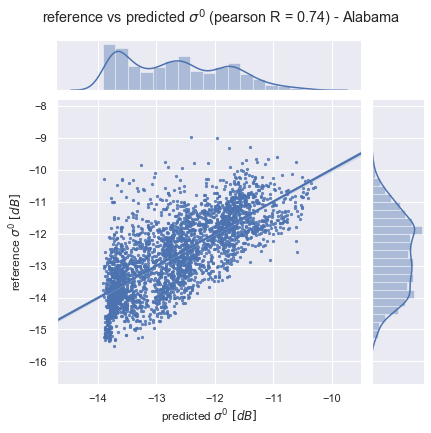

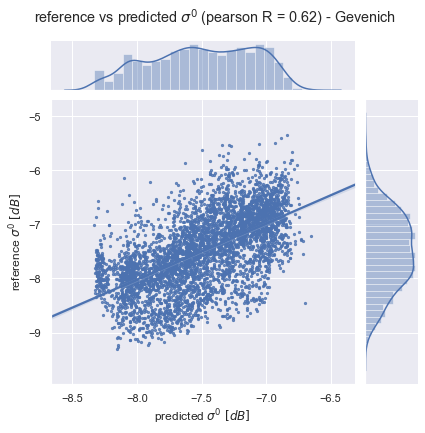

In [10]:
# pred vs ref σ0
from scipy import stats
for loc in locations:
    pearR = stats.spearmanr(σ0_opt[loc].pred, data[loc].SIG40).correlation
    g = sns.jointplot(σ0_opt[loc].pred, data[loc].SIG40, kind="reg", label=f"pearson R = {pearR:.2f}", scatter_kws={"s": 5})
    plt.xlabel("predicted $\sigma^0 \ [dB]$")
    plt.ylabel("reference $\sigma^0 \ [dB]$")  
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle('Title', fontsize=12)
    g.fig.suptitle(f"reference vs predicted $\sigma^0$ (pearson R = {pearR:.2f}) - {locsFull[loc]}")
#     plt.legend()
    plt.savefig(os.path.join("plots", "regression", f"regr_{loc}.png"), bbox_inches = "tight")
    plt.show()